In [1]:
%load_ext autoreload
%autoreload 2

from parse import get_data_dict, get_data_dict_T, get_data_matrix, get_data_matrix_T, get_data_averages, get_data_IUFs
import matplotlib.pyplot as plt
import numpy as np
import train_test
import recommend
import contextlib
import io
from sklearn.cluster import KMeans

Seeded Steps: [186, 69, 83, 171, 115, 232, 207, 222, 132, 215, 163, 216, 114, 159, 138, 132, 128, 132, 79, 78, 112, 188, 182, 201, 195, 213, 70, 127, 174, 63]


In [4]:
movie_average_rating = get_data_averages('train.txt')
no_ratings = list(map(lambda x: x+1, np.where(np.array(movie_average_rating) == None)))
print(f"Movies with no ratings: {no_ratings}")

Movies with no ratings: [array([777, 793, 899, 911, 967, 987])]


[]

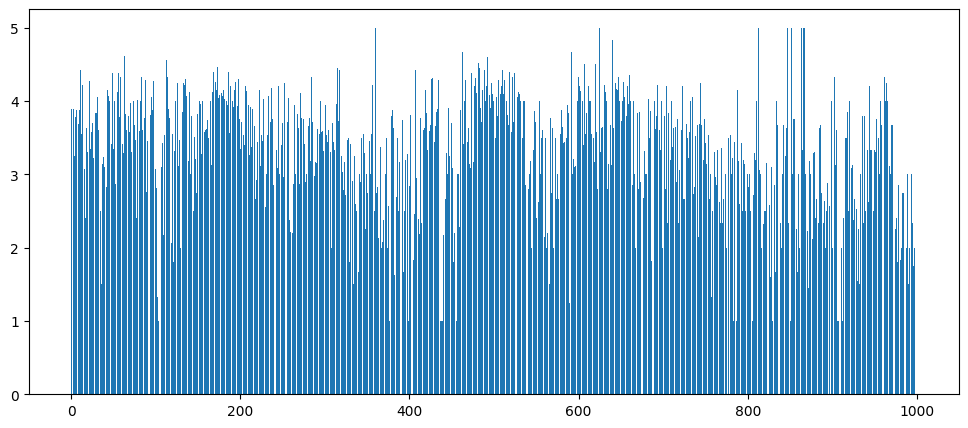

In [5]:
plt.figure(figsize=(12, 5))
plt.bar(range(1000), height=list(map(lambda x: x if x else 0, movie_average_rating)))
plt.plot()

[]

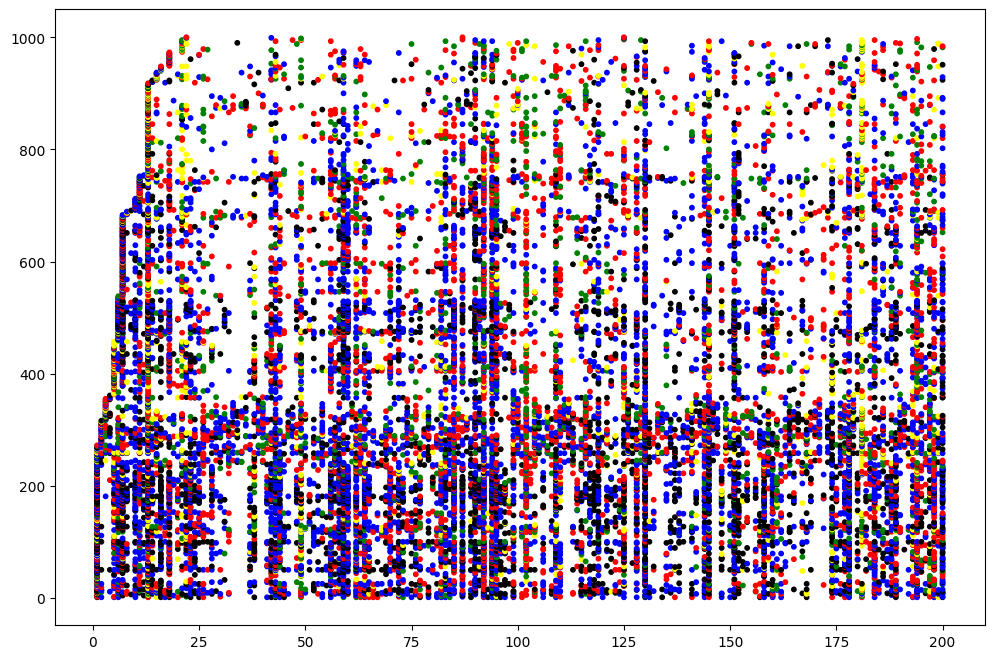

In [6]:
data = get_data_dict('train.txt')

colors = ["yellow", "green", "red", "blue", "black"]

plt.figure(figsize=(12, 8))
for user in data:
  x = [user] * len(data[user])
  y = list(data[user].keys())
  assert len(x) == len(y)
  mycolors = [colors[data[user][movie] - 1] for movie in y]
  plt.scatter(x, y, s=10, c=mycolors)
plt.plot()

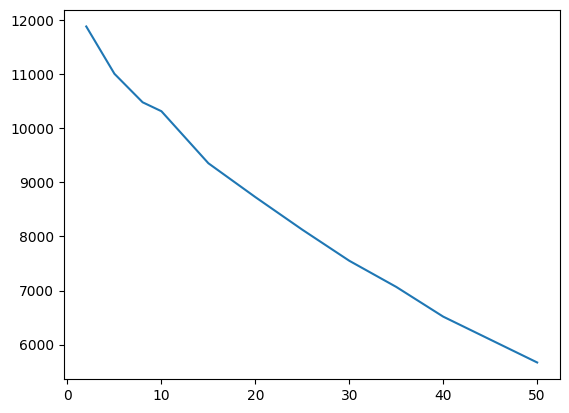

In [7]:
matrix = get_data_matrix('train.txt')
matrix = np.array(list(map(lambda row: [1 if col else 0 for col in row], matrix)))
inertias = []
for k in [2, 5, 8, 10, 15, 20, 25, 30, 35, 40, 50]:
  kmeans = KMeans(n_clusters=k)
  kmeans.fit(matrix)
  inertias.append(kmeans.inertia_)

plt.plot([2, 5, 8, 10, 15, 20, 25, 30, 35, 40, 50], inertias)

In [8]:
# kmeans = KMeans(n_clusters=15)
# kmeans.fit(matrix)
# colors = [
#     "blue", "green", "red", "cyan", "magenta", 
#     "yellow", "black", "white", "orange", "purple", 
#     "pink", "brown", "gray", "lime", "teal"
# ]

# plt.figure(figsize=(12, 8))
# for i, user in enumerate(data):
#   x = [user] * len(data[user])
#   y = list(data[user].keys())
#   mycolors = [colors[kmeans.labels_[i]]] * len(data[user])
#   assert len(x) == len(y)
#   plt.scatter(x, y, s=10, c=mycolors)
# plt.plot()

In [9]:
# matrix_T = get_data_matrix_T('train.txt')
# # matrix_T = np.array(list(map(lambda row: [1 if col else 0 for col in row], matrix_T)))
# inertias = []
# for k in [2, 5, 8, 10, 15, 20, 25, 30, 35, 40, 50]:
#   kmeans = KMeans(n_clusters=k)
#   kmeans.fit(matrix_T)
#   inertias.append(kmeans.inertia_)

# plt.plot([2, 5, 8, 10, 15, 20, 25, 30, 35, 40, 50], inertias)

In [10]:
# kmeans = KMeans(n_clusters=15)
# kmeans.fit(matrix_T)
# colors = [
#     "blue", "green", "red", "cyan", "magenta", "yellow", "black", "white", "orange", "purple",
#     "pink", "brown", "gray", "lime", "teal", "navy", "gold", "violet", "indigo", "turquoise",
#     "salmon", "coral", "maroon", "olive", "chocolate"
# ]


# data_T = get_data_dict_T('train.txt')
# plt.figure(figsize=(12, 8))
# for i, movie in enumerate(data_T):
#   x = [movie] * len(data_T[movie])
#   y = list(data_T[movie].keys())
#   mycolors = [colors[kmeans.labels_[i]]] * len(data_T[movie])
#   assert len(x) == len(y)
#   plt.scatter(y, x, s=10, c=mycolors)
# plt.plot()

In [11]:
IUFs = get_data_IUFs('train.txt')
print(IUFs)

[np.float64(1.340075441597622), np.float64(3.5563933485243853), np.float64(3.736965594166206), np.float64(2.888968687611256), np.float64(4.058893689053568), np.float64(4.473931188332412), np.float64(1.340075441597622), np.float64(2.5145731728297585), np.float64(1.9434164716336326), np.float64(3.9434164716336326), np.float64(2.2515387669959646), np.float64(2.15200309344505), np.float64(2.1844245711374275), np.float64(2.643856189774725), np.float64(1.8365012677171206), np.float64(5.321928094887363), np.float64(3.9434164716336326), np.float64(5.321928094887363), np.float64(4.184424571137428), np.float64(3.9434164716336326), np.float64(3.395928676331139), np.float64(2.15200309344505), np.float64(2.7858751946471525), np.float64(2.643856189774725), np.float64(1.5777669993169523), np.float64(4.321928094887363), np.float64(4.473931188332412), np.float64(2.1844245711374275), np.float64(3.5563933485243853), np.float64(5.058893689053568), np.float64(3.0), np.float64(3.321928094887362), np.float64

In [12]:
# train_test.generate_train_test_split("train.txt", [(10,15), (25,30), (50,55) ,(95,100), (125,130), (145,150), (175,180)])

In [13]:
with contextlib.redirect_stdout(io.StringIO()):
  res5 = []
  res10 = []
  res20 = []
  for K in [15, 30, 45]:
    mae5, mae10, mae20 = train_test.train_test(recommend.v1, K=K)
    res5.append(mae5)
    res10.append(mae10)
    res20.append(mae20)

res5 = list(map(lambda x: round(float(x), 3), res5))
res10 = list(map(lambda x: round(float(x), 3), res10))
res20 = list(map(lambda x: round(float(x), 3), res20))

print(res5)
print(res10)
print(res20)

[0.87, 0.869, 0.87]
[0.862, 0.862, 0.86]
[0.865, 0.859, 0.856]


In [14]:
# with contextlib.redirect_stdout(io.StringIO()):
#   res5 = []
#   res10 = []
#   res20 = []
#   for K in [15, 30, 45]:
#     mae5, mae10, mae20 = train_test.train_test(recommend.v2, K=K)
#     res5.append(mae5)
#     res10.append(mae10)
#     res20.append(mae20)

# res5 = list(map(lambda x: round(float(x), 3), res5))
# res10 = list(map(lambda x: round(float(x), 3), res10))
# res20 = list(map(lambda x: round(float(x), 3), res20))

# print(res5)
# print(res10)
# print(res20)

In [15]:
# with contextlib.redirect_stdout(io.StringIO()):
#   res5 = []
#   res10 = []
#   res20 = []
#   # for K in [15, 30, 45]:
#   for K in [40]:
#     mae5, mae10, mae20 = train_test.train_test(recommend.v3, K=K)
#     res5.append(mae5)
#     res10.append(mae10)
#     res20.append(mae20)

# res5 = list(map(lambda x: round(float(x), 3), res5))
# res10 = list(map(lambda x: round(float(x), 3), res10))
# res20 = list(map(lambda x: round(float(x), 3), res20))

# print(res5)
# print(res10)
# print(res20)

In [16]:
# with contextlib.redirect_stdout(io.StringIO()):
#   res5 = []
#   res10 = []
#   res20 = []
#   for K in [15, 30]:
#     mae5, mae10, mae20 = train_test.train_test(recommend.v4, K=K)
#     res5.append(mae5)
#     res10.append(mae10)
#     res20.append(mae20)

# res5 = list(map(lambda x: round(float(x), 3), res5))
# res10 = list(map(lambda x: round(float(x), 3), res10))
# res20 = list(map(lambda x: round(float(x), 3), res20))

# print(res5)
# print(res10)
# print(res20)

In [17]:
# with contextlib.redirect_stdout(io.StringIO()):
#   res5 = []
#   res10 = []
#   res20 = []
#   for K in [15, 30]:
#     mae5, mae10, mae20 = train_test.train_test(recommend.v5, K=K)
#     res5.append(mae5)
#     res10.append(mae10)
#     res20.append(mae20)

# res5 = list(map(lambda x: round(float(x), 3), res5))
# res10 = list(map(lambda x: round(float(x), 3), res10))
# res20 = list(map(lambda x: round(float(x), 3), res20))

# print(res5)
# print(res10)
# print(res20)

In [18]:
# with contextlib.redirect_stdout(io.StringIO()):
#   res5 = []
#   res10 = []
#   res20 = []
#   # for K in [3, 4, 5]:
#   for K in [3, 5, 10, 15, 20]:
#     mae5, mae10, mae20 = train_test.train_test(recommend.v6, K=K)
#     res5.append(mae5)
#     res10.append(mae10)
#     res20.append(mae20)

# res5 = list(map(lambda x: round(float(x), 3), res5))
# res10 = list(map(lambda x: round(float(x), 3), res10))
# res20 = list(map(lambda x: round(float(x), 3), res20))

# print(res5)
# print(res10)
# print(res20)

In [19]:
# with contextlib.redirect_stdout(io.StringIO()):
#   res5 = []
#   res10 = []
#   res20 = []
#   # for K in [3, 4, 5]:
#   for K in [20, 30, 40]:
#     mae5, mae10, mae20 = train_test.train_test(recommend.v7, K=K)
#     res5.append(mae5)
#     res10.append(mae10)
#     res20.append(mae20)

# res5 = list(map(lambda x: round(float(x), 3), res5))
# res10 = list(map(lambda x: round(float(x), 3), res10))
# res20 = list(map(lambda x: round(float(x), 3), res20))

# print(res5)
# print(res10)
# print(res20)

In [20]:
# with contextlib.redirect_stdout(io.StringIO()):
#   res5 = []
#   res10 = []
#   res20 = []
#   for K in [(40, 20)]:
#     mae5, mae10, mae20 = train_test.train_test(recommend.v8, K=K)
#     res5.append(mae5)
#     res10.append(mae10)
#     res20.append(mae20)

# res5 = list(map(lambda x: round(float(x), 3), res5))
# res10 = list(map(lambda x: round(float(x), 3), res10))
# res20 = list(map(lambda x: round(float(x), 3), res20))

# print(res5)
# print(res10)
# print(res20)

In [31]:
mae5, mae10, mae20 = train_test.train_test(recommend.v9, K=None)

print(mae5)
print(mae10)
print(mae20)

0.77159378388146
0.77159378388146
0.77159378388146


In [22]:
with contextlib.redirect_stdout(io.StringIO()):
  res5 = []
  res10 = []
  res20 = []
  for K in [40]:
    mae5, mae10, mae20 = train_test.train_test(recommend.v10, K=K)
    res5.append(mae5)
    res10.append(mae10)
    res20.append(mae20)

res5 = list(map(lambda x: round(float(x), 3), res5))
res10 = list(map(lambda x: round(float(x), 3), res10))
res20 = list(map(lambda x: round(float(x), 3), res20))

print(res5)
print(res10)
print(res20)

c:\Users\yelir\Documents\GitHub\CSEN-169-Projects\recommendations\env\Lib\site-packages\numpy\lib\_function_base_impl.py:552: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
c:\Users\yelir\Documents\GitHub\CSEN-169-Projects\recommendations\env\Lib\site-packages\numpy\_core\_methods.py:145: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


[0.909]
[0.861]
[0.799]


In [23]:
# with contextlib.redirect_stdout(io.StringIO()):
#   res5 = []
#   res10 = []
#   res20 = []
#   for K in [40]:
#     mae5, mae10, mae20 = train_test.train_test(recommend.v11, K=K)
#     res5.append(mae5)
#     res10.append(mae10)
#     res20.append(mae20)

# res5 = list(map(lambda x: round(float(x), 3), res5))
# res10 = list(map(lambda x: round(float(x), 3), res10))
# res20 = list(map(lambda x: round(float(x), 3), res20))

# print(res5)
# print(res10)
# print(res20)

In [24]:
with contextlib.redirect_stdout(io.StringIO()):
  res5 = []
  res10 = []
  res20 = []
  for K in [40, 50, 55, 60, 65, 75]:
    mae5, mae10, mae20 = train_test.train_test(recommend.v12, K=K)
    res5.append(mae5)
    res10.append(mae10)
    res20.append(mae20)

res5 = list(map(lambda x: round(float(x), 3), res5))
res10 = list(map(lambda x: round(float(x), 3), res10))
res20 = list(map(lambda x: round(float(x), 3), res20))

print(res5)
print(res10)
print(res20)

[0.89, 0.89, 0.891, 0.891, 0.891, 0.891]
[0.829, 0.828, 0.828, 0.828, 0.827, 0.827]
[0.798, 0.8, 0.8, 0.8, 0.8, 0.8]


In [25]:
# with contextlib.redirect_stdout(io.StringIO()):
#   res5 = []
#   res10 = []
#   res20 = []
#   for K in [40]:
#     mae5, mae10, mae20 = train_test.train_test(recommend.v13, K=K)
#     res5.append(mae5)
#     res10.append(mae10)
#     res20.append(mae20)

# res5 = list(map(lambda x: round(float(x), 3), res5))
# res10 = list(map(lambda x: round(float(x), 3), res10))
# res20 = list(map(lambda x: round(float(x), 3), res20))

# print(res5)
# print(res10)
# print(res20)

In [26]:
# mae5, mae10, mae20 = train_test.train_test(recommend.v14, K=None)

# print(mae5)
# print(mae10)
# print(mae20)

In [27]:
with contextlib.redirect_stdout(io.StringIO()):
  res5 = []
  res10 = []
  res20 = []
  for K in [45, 50, 55, 60]:
    mae5, mae10, mae20 = train_test.train_test(recommend.v15, K=K)
    res5.append(mae5)
    res10.append(mae10)
    res20.append(mae20)

res5 = list(map(lambda x: round(float(x), 3), res5))
res10 = list(map(lambda x: round(float(x), 3), res10))
res20 = list(map(lambda x: round(float(x), 3), res20))

print(res5)
print(res10)
print(res20)

[0.847, 0.848, 0.847, 0.847]
[0.831, 0.832, 0.832, 0.831]
[0.839, 0.84, 0.84, 0.84]


In [28]:
with contextlib.redirect_stdout(io.StringIO()):
  res5 = []
  res10 = []
  res20 = []
  for K in [40, 50, 55, 60, 65, 75]:
    mae5, mae10, mae20 = train_test.train_test(recommend.v16, K=K)
    res5.append(mae5)
    res10.append(mae10)
    res20.append(mae20)

res5 = list(map(lambda x: round(float(x), 3), res5))
res10 = list(map(lambda x: round(float(x), 3), res10))
res20 = list(map(lambda x: round(float(x), 3), res20))

print(res5)
print(res10)
print(res20)

[0.888, 0.888, 0.888, 0.888, 0.888, 0.888]
[0.829, 0.83, 0.83, 0.831, 0.831, 0.831]
[0.786, 0.786, 0.786, 0.786, 0.787, 0.786]


In [41]:
with contextlib.redirect_stdout(io.StringIO()):
  res5 = []
  res10 = []
  res20 = []
  # 1.5 1.5 1 1 == 2 2 1 1
  # for K in [(2, 2, 1, 1, 1)]:
  for K in [(1, 1, 1, 1, 0), (2, 2, 1, 1, 0), (2, 2, 1, 1, 1),
            (1, 2, 1, 1, 1)]:
    mae5, mae10, mae20 = train_test.train_test(recommend.v17, K=K)
    res5.append(mae5)
    res10.append(mae10)
    res20.append(mae20)

res5 = list(map(lambda x: round(float(x), 3), res5))
res10 = list(map(lambda x: round(float(x), 3), res10))
res20 = list(map(lambda x: round(float(x), 3), res20))

print(res5)
print(res10)
print(res20)

[0.812, 0.806, 0.844, 0.856]
[0.782, 0.774, 0.803, 0.808]
[0.774, 0.769, 0.792, 0.793]


In [1]:
import ensemble
import train_test

res5 = []
res10 = []
res20 = []
# 1.5 1.5 1 1 == 2 2 1 1
for K in [(2, 2, 2, 1, 1)]:
# for K in [(1, 1, 1, 1, 0), (1, 1, 1, 1, 1), (1, 2, 1, 1, 1), (2, 2, 1, 1, 1)]:
  mae5, mae10, mae20 = train_test.train_test(ensemble.ensemble, K=K)
  res5.append(mae5)
  res10.append(mae10)
  res20.append(mae20)

res5 = list(map(lambda x: round(float(x), 3), res5))
res10 = list(map(lambda x: round(float(x), 3), res10))
res20 = list(map(lambda x: round(float(x), 3), res20))

print(res5)
print(res10)
print(res20)

Seeded Steps: [186, 69, 83, 171, 115, 232, 207, 222, 132, 215, 163, 216, 114, 159, 138, 132, 128, 132, 79, 78, 112, 188, 182, 201, 195, 213, 70, 127, 174, 63]


c:\Users\yelir\Documents\GitHub\CSEN-169-Projects\recommendations\env\Lib\site-packages\numpy\lib\_function_base_impl.py:552: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
c:\Users\yelir\Documents\GitHub\CSEN-169-Projects\recommendations\env\Lib\site-packages\numpy\_core\_methods.py:145: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


[0.816]
[0.781]
[0.772]
